### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.random.set_seed(42)
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


In [2]:
tf.__version__

'2.0.0'

### Collect Data

In [3]:
import keras

In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:20])
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

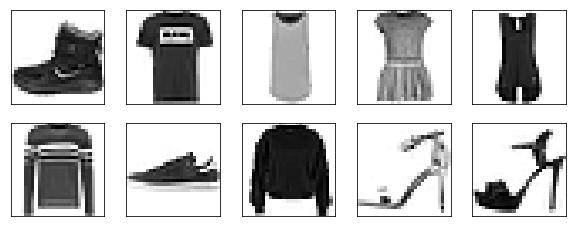

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

trainX = trainX / 255.0
testX = testX / 255.0


plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [9]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(10, activation='softmax')) 

model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [10]:
model.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8214 - accuracy: 0.7393
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5921 - accuracy: 0.8074
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5423 - accuracy: 0.8218
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5156 - accuracy: 0.8290
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4983 - accuracy: 0.8336
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4855 - accuracy: 0.8369
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4758 - accuracy: 0.8398
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4677 - accuracy: 0.8425
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4614 - accuracy: 0.8436
Epoch 10/10
60

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [11]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(10, activation='softmax')) 

model1.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [12]:
model1.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5913 - accuracy: 0.7965
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4888 - accuracy: 0.8305
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4668 - accuracy: 0.8382
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4548 - accuracy: 0.8420
Epoch 5/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4488 - accuracy: 0.8461
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4432 - accuracy: 0.8457
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4392 - accuracy: 0.8475
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4351 - accuracy: 0.8503
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4312 - accuracy: 0.8513
Epoch 10/10
60

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [13]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(10, activation='softmax')) 

sgd = optimizers.SGD(lr=0.001)
model2.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
model2.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.5941 - accuracy: 0.7968
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4885 - accuracy: 0.8322
Epoch 3/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4669 - accuracy: 0.8392
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4553 - accuracy: 0.8421
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4492 - accuracy: 0.8449
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4433 - accuracy: 0.8456
Epoch 7/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4392 - accuracy: 0.8472
Epoch 8/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4354 - accuracy: 0.8492
Epoch 9/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4313 - accuracy: 0.8502
Epoch 10/10
6

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [15]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 3rd hidden layer / output layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))


sgd = optimizers.SGD(lr=0.03)
model3.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [16]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [17]:
model3.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 1.5106 - accuracy: 0.6007
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.8568 - accuracy: 0.7325
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.6895 - accuracy: 0.7603
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.6120 - accuracy: 0.7842
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5643 - accuracy: 0.8017
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5299 - accuracy: 0.8128
Epoch 7/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5056 - accuracy: 0.8202
Epoch 8/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4862 - accuracy: 0.8271
Epoch 9/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4713 - accuracy: 0.8319
Epoch

In [18]:
import numpy as np
input_data = np.expand_dims(testX[0], axis=0)
print(input_data.shape)
pred = model.predict(input_data)
pred

(1, 28, 28)


array([[1.61107691e-05, 2.02614447e-05, 1.05405656e-04, 5.77778665e-05,
        2.39225570e-04, 1.42156050e-01, 2.21264039e-04, 2.19284162e-01,
        1.05838496e-02, 6.27315819e-01]], dtype=float32)

In [19]:
pred[0]

array([1.61107691e-05, 2.02614447e-05, 1.05405656e-04, 5.77778665e-05,
       2.39225570e-04, 1.42156050e-01, 2.21264039e-04, 2.19284162e-01,
       1.05838496e-02, 6.27315819e-01], dtype=float32)

In [20]:
np.argmax(pred[0])

9

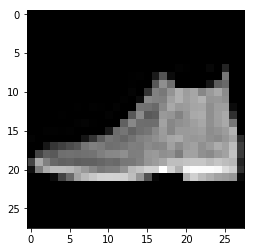

In [21]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')

In [22]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)